In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Reshape the data to include the channel dimension and normalize to [0,1]
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

In [4]:
# Build the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for the digits 0-9
])


c:\Users\Karthick Selvam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8967 - loss: 0.3342 - val_accuracy: 0.9852 - val_loss: 0.0460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9910 - val_loss: 0.0296
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9893 - loss: 0.0330 - val_accuracy: 0.9873 - val_loss: 0.0411
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9900 - val_loss: 0.0331
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9892 - val_loss: 0.0363


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9868 - loss: 0.0431
Test accuracy: 0.9891999959945679


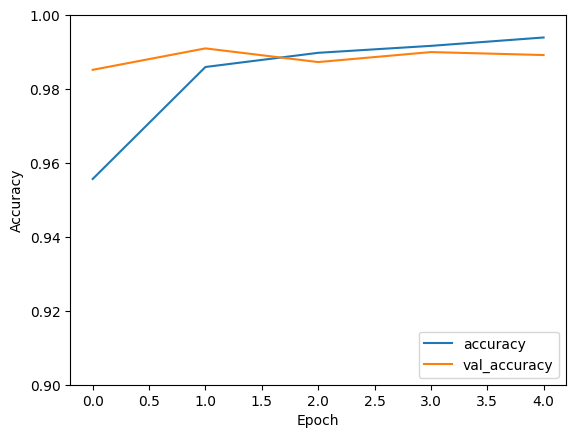

In [8]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()